In [3]:
import cv2
from keras.models import load_model
from keras.utils.generic_utils import CustomObjectScope
import keras
import keras.backend as K
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys

In [4]:
def relu6(x):
    return K.relu(x, max_value=6)

In [5]:
with CustomObjectScope({'relu6': relu6,'DepthwiseConv2D': keras.layers.DepthwiseConv2D}):
    model = load_model('my_model.h5')

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [6]:
def read_img(img_path, crop_specs, input_sz=(224, 224)):
    """
    Read image file and return cropped, resized, intensity-normalized array
        Arguments
            :img_path: str
            :crop_specs: list
            :input_sz: tuple
        Output
            :rgb_norm: numpy array
    """
    bgr = cv2.imread(img_path)
    rgb = bgr[:,:,::-1]
    if len(crop_specs) == 4:
        rgb = rgb[ crop_specs[0]:crop_specs[1], crop_specs[2]:crop_specs[3], :]
    rgb = cv2.resize(rgb, (600, 800))
    rgb = cv2.resize(rgb, input_sz)
    rgb_norm = rgb.astype(np.float32)/ 255.
    
    return rgb_norm

In [7]:
path = r'C:\Users\Admin\Desktop\BG_sub\child.png'
image = cv2.imread(path)
rows, cols, _ = image.shape
crop_specs = [int(0.05*rows), int(0.95*rows), int(0.05*cols), int(0.95*cols)]
image_rz = read_img(path, crop_specs)
print(type(image_rz))
img = np.array([image_rz])
print(type(img))
print('img shape:', img.shape)
print('image_rz shape:', image_rz.shape)
output = model.predict(img)
print('pred_mask:',output.shape)
print(image_rz.shape)
# plt.imshow(output[0, :, :, 0])
# cv2.imwrite('007.jpg', output[0, :, :, 0])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
img shape: (1, 224, 224, 3)
image_rz shape: (224, 224, 3)
pred_mask: (1, 224, 224, 1)
(224, 224, 3)


In [8]:
# image with no background
y = np.squeeze(output)
#
matplotlib.image.imsave('name.png', y)
img1 = cv2.imread('name.png')
print('img1 shape:', img1.shape)
k = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
print('Is img1 == k --->',img1==k)
print('k-->',k.shape)
# cv2.imshow('Gray image', k)
y = np.expand_dims(k,axis=2)
# y.shape
print('y :',y.shape)
combo = y*image_rz
combo.shape

img1 shape: (224, 224, 3)
Is img1 == k ---> False
k--> (224, 224)
y : (224, 224, 1)


c:\python\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


(224, 224, 3)

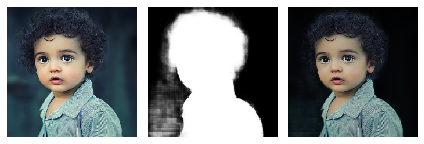

In [9]:
f, ax = plt.subplots(1, 3)
ax[0].imshow(image_rz)
ax[1].imshow(output[0,:,:,0], cmap='gray')
ax[2].imshow(combo.astype("uint8"))
ax[0].axis("off"), ax[1].axis("off"), ax[2].axis("off")
plt.tight_layout()
plt.show()

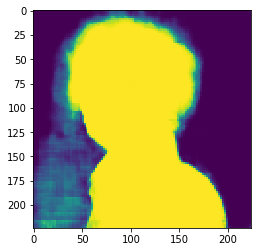

In [10]:
plt.imshow(k)

In [11]:
img1.shape

(224, 224, 3)

In [12]:
child = cv2.imread('child.png')
k = cv2.cvtColor(child, cv2.COLOR_BGR2GRAY)
# plt.imshow(k[:,:-1])
# cv2.imshow('B&W',k)
# cv2.waitKey(0)
print(k.shape)
print(child.shape)

(757, 695)
(757, 695, 3)


In [13]:
output.shape

(1, 224, 224, 1)

In [14]:
s = np.reshape(output, (224, 224, 1))
s.shape
# cv2.imshow('BW', s)

(224, 224, 1)

In [15]:
img1.shape

(224, 224, 3)

In [16]:
output.shape

(1, 224, 224, 1)

In [19]:
x = np.squeeze(output)
x = np.expand_dims(x, axis=2)
x.shape

(224, 224, 1)

In [20]:
combo = x*image_rz
combo.shape

(224, 224, 3)

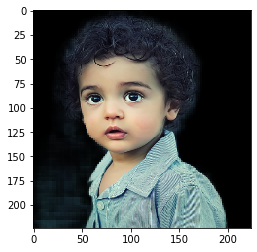

In [21]:
plt.imshow(combo)